In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from scipy import linalg
import math
import cmath

# 1.1 Cadena Infinita

In [18]:
def bandas(v,w,k):
    return np.sqrt(v**2 + w**2 + 2*v*w*np.cos(a*k))

In [4]:
a = 1
k = np.linspace(-np.pi/a, np.pi/a)
valores = np.linspace(0,1,5)

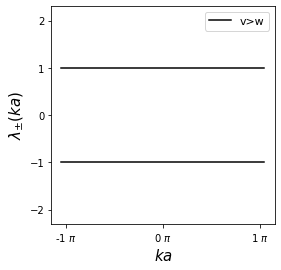

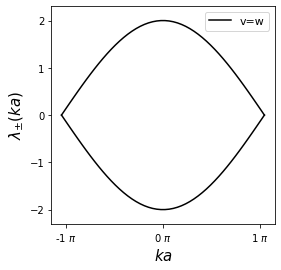

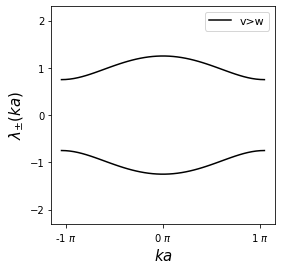

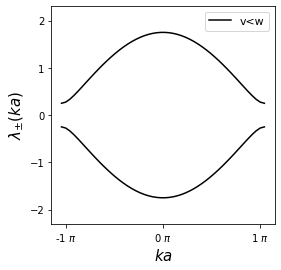

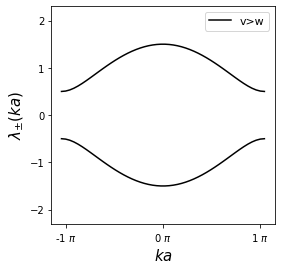

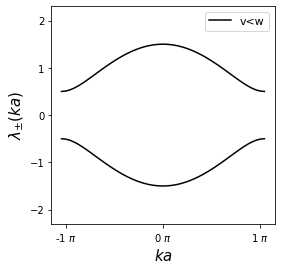

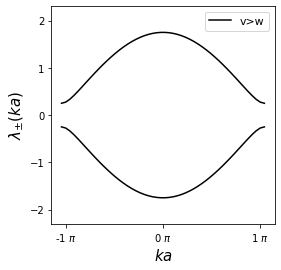

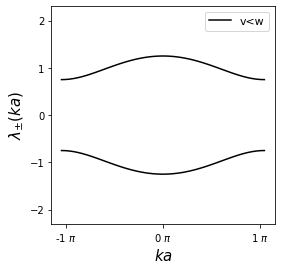

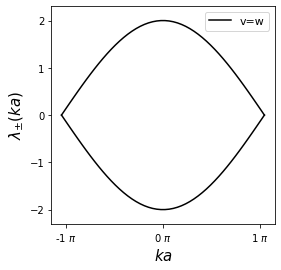

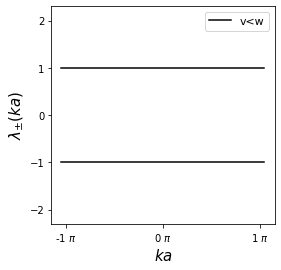

In [16]:
for i in range(len(valores)):
    f,ax=plt.subplots(figsize=(4,4))
    v = 1
    w = valores[i]
    etiqueta = ""
    E = bandas(v,w,k)
    
    if (v>w):
        etiqueta = "v>w"
    else:
        etiqueta = "v=w"
    ax.plot(k/3,E, c = "black", label = etiqueta)
    ax.plot(k/3,-E, c = "black")
    ax.set_ylim(-2.3,2.3)
    ax.legend(fontsize= 11)
    ax.set_xlabel(r'$ka$', fontsize= 15)
    ax.set_ylabel(r'$\lambda_{\pm}(ka)$', fontsize= 15)
    ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
    ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
    plt.savefig("Imagen" + str(i + 1) + ".pdf", dpi=300, bbox_inches='tight')
    
    f,ax=plt.subplots(figsize=(4,4))
    v = valores[len(valores) - i - 1]
    w = 1
    etiqueta = ""
    E = bandas(v,w,k)
    
    if (v<w):
        etiqueta = "v<w"
    else:
        etiqueta = "v=w"
        
    ax.plot(k/3,E, c = "black", label = etiqueta)
    ax.plot(k/3,-E, c = "black")
    ax.set_ylim(-2.3,2.3)
    ax.legend(fontsize= 11)
    ax.set_xlabel(r'$ka$', fontsize= 15)
    ax.set_ylabel(r'$\lambda_{\pm}(ka)$', fontsize= 15)
    ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
    ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
    plt.savefig("Imagen" + str(i + 1 + len(valores)) + ".pdf", dpi=300, bbox_inches='tight')
    

## Invariante Topológico.

In [19]:
def dx(v,w,k):
    return v + w*np.cos(k)
def dy(w,k):
    return w*np.sin(k)

def h(v,w,k):
    return dx(v,w,k) - 1j*dy(w,k)

def winding(v,w):
    N = 200000
    suma = 0
    for i in range(1,N):
        suma = suma + np.log(h(v,w,(i+1)*2*np.pi/N)/h(v,w,i*2*np.pi/N))
    winding = suma/(1j*2*np.pi)
    return np.abs(winding)

In [187]:
w = 0.5
v = np.linspace(0,1,100)
invariantes = np.array([])
for j in range(len(v)):
    invariantes = np.append(invariantes, winding(v[j],w))

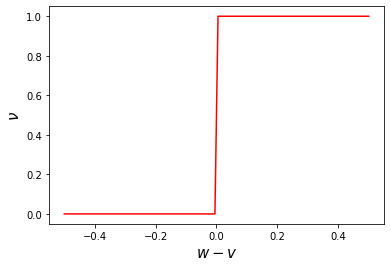

In [189]:
fig = plt.figure(figsize = (6,4))
plt.plot(w-v,invariantes, c = "red")
plt.xlabel(r'$w - v$', fontsize= 15)
plt.ylabel(r'$\nu$', fontsize= 15)
plt.savefig("winding.pdf", dpi=300, bbox_inches='tight')

0.0
1.999999999659807e-06
0.9999942857142895
3.3333333323722474e-06
0.9999933333333244
4.285714283940615e-06
0.9999919999999952
4.9999999973422685e-06
0.9999899999999999


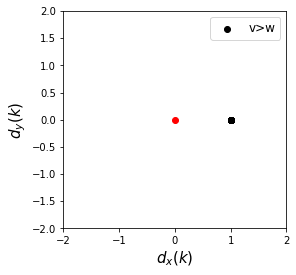

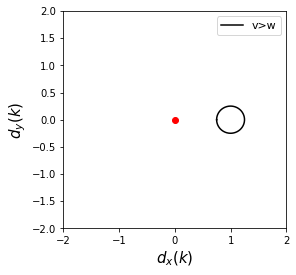

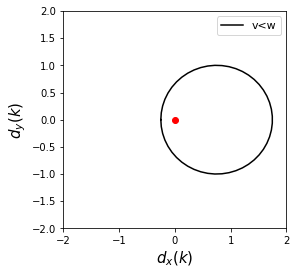

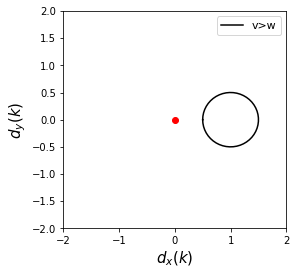

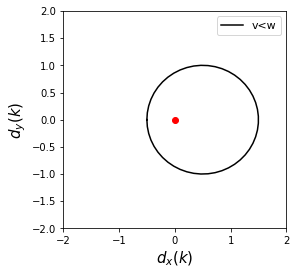

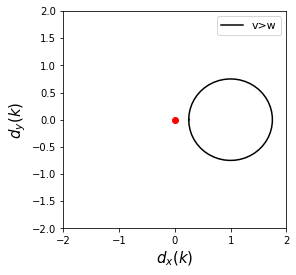

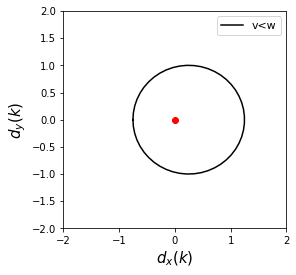

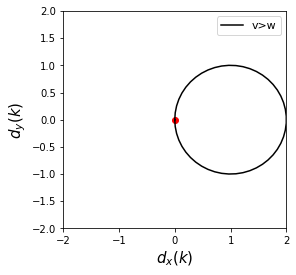

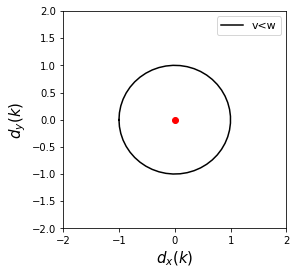

In [125]:
for i in range(len(valores)):
    
    if (i == 0):
        fig = plt.figure(figsize = (4,4))
        v = 1
        w = valores[i]
        y = dy(w,k)
        x = dx(v,w,k)
        plt.scatter(x,y, c = "black", label = "v>w" )
        plt.scatter(0,0, c = "red")
        plt.xlim(-2,2)
        plt.ylim(-2,2)
        plt.xlabel(r'$d_{x}(k)$', fontsize= 15)
        plt.ylabel(r'$d_{y}(k)$', fontsize= 15)
        plt.legend(fontsize= 12)
        
        #plt.savefig("Imagen_" + str(i + 1) + ".pdf", dpi=300, bbox_inches='tight')
        
    else:
        fig = plt.figure(figsize = (4,4))
        v = 1
        w = valores[i]
        y = dy(w,k)
        x = dx(v,w,k)
        plt.plot(x,y, c = "black", label = "v>w" )
        plt.scatter(0,0, c = "red")
        plt.xlim(-2,2)
        plt.ylim(-2,2)
        plt.xlabel(r'$d_{x}(k)$', fontsize= 15)
        plt.ylabel(r'$d_{y}(k)$', fontsize= 15)
        plt.legend(fontsize= 11)
        #plt.savefig("Imagen_" + str(i + 1) + ".pdf", dpi=300, bbox_inches='tight')

        fig = plt.figure(figsize = (4,4))
        v = valores[len(valores) - i - 1]
        w = 1
        y = dy(w,k)
        x = dx(v,w,k)
        plt.plot(x,y, c = "black", label = "v<w" )
        plt.scatter(0,0, c = "red")
        plt.xlim(-2,2)
        plt.ylim(-2,2)
        plt.xlabel(r'$d_{x}(k)$', fontsize= 15)
        plt.ylabel(r'$d_{y}(k)$', fontsize= 15)
        plt.legend(fontsize= 11)
        #plt.savefig("Imagen_" + str(i + 1 + len(valores)) + ".pdf", dpi=300, bbox_inches='tight')

# 2.2 Cadena Finita

In [10]:
# Ejemplo. Construcción de una Matriz Tridiagonal simetrica

N = 5
    
Matriz = np.zeros((N,N))

a = 1
b = 2
c = 3

for i in range(N):
    Matriz[i,i] = a
for i in range(N-1):
    if (i%2 == 0):
        Matriz[i+1,i] = c
        Matriz[i,i+1] = c
    else:
        Matriz[i+1,i] = b
        Matriz[i,i+1] = b
    
print(Matriz)

[[1. 3. 0. 0. 0.]
 [3. 1. 2. 0. 0.]
 [0. 2. 1. 3. 0.]
 [0. 0. 3. 1. 2.]
 [0. 0. 0. 2. 1.]]


## 2.2.1 PBC

In [20]:
def Vpropios_Diag_PBC(delta):
    global N
    Matriz = np.zeros((N,N))

    a = 0 #diagonal
    b = 1 + delta #la que aparece despues
    c = 1 - delta #la que aparece primero

    for i in range(N):
        Matriz[i,i] = a
    for i in range(N-1):
        if (i%2 == 0):
            Matriz[i+1,i] = c
            Matriz[i,i+1] = c
        else:
            Matriz[i+1,i] = b
            Matriz[i,i+1] = b
            
    Matriz[0,N-1] = b
    Matriz[N-1,0] = b
            
    return np.linalg.eigvals(Matriz)    

C:\Users\joaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\joaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\joaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\joaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\joaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values t

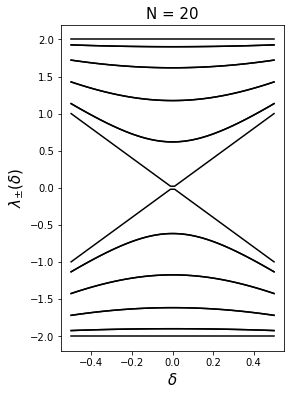

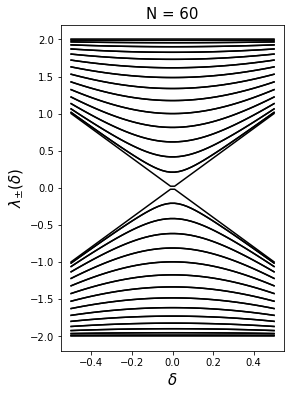

In [24]:
N = 20

anisotropias = np.linspace(-0.5,0.5,50)

for j in range(len(anisotropias)):
    anisotropia = anisotropias[j]
    lambda_k = np.sort(Vpropios_Diag_PBC(anisotropia))

    if (j >= 1):
        Valores_Columna = np.vstack([Valores_Columna, lambda_k])
    else:
        Valores_Columna = lambda_k

fig = plt.figure(figsize = (4,6))
Valores_Propios = np.transpose(Valores_Columna)

for i in range(len(Valores_Propios)):
    plt.plot(anisotropias, Valores_Propios[i], c = "black")  
    
#plt.grid()

plt.title("N = 20", fontsize= 15)
plt.xlabel(r'$\delta$', fontsize= 15)
plt.ylabel(r'$\lambda_{\pm}(\delta)$', fontsize= 15)

#plt.savefig("SSH_FINITE_PBC_1.pdf", dpi=300, bbox_inches='tight')

N = 60

anisotropias = np.linspace(-0.5,0.5,50)

for j in range(len(anisotropias)):
    anisotropia = anisotropias[j]
    lambda_k = np.sort(Vpropios_Diag_PBC(anisotropia))

    if (j >= 1):
        Valores_Columna = np.vstack([Valores_Columna, lambda_k])
    else:
        Valores_Columna = lambda_k

fig = plt.figure(figsize = (4,6))
Valores_Propios = np.transpose(Valores_Columna)

for i in range(len(Valores_Propios)):
    plt.plot(anisotropias, Valores_Propios[i], c = "black")  
    
#plt.grid()

plt.title("N = 60", fontsize= 15)
plt.xlabel(r'$\delta$', fontsize= 15)
plt.ylabel(r'$\lambda_{\pm}(\delta)$', fontsize= 15)

plt.savefig("SSH_FINITE_PBC_2.pdf", dpi=300, bbox_inches='tight')

C:\Users\joaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\joaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\joaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\joaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\joaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values t

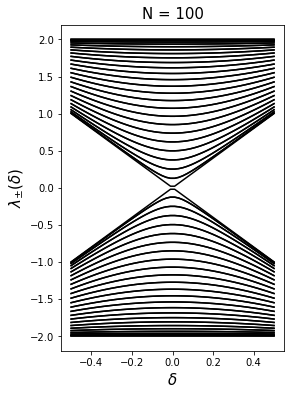

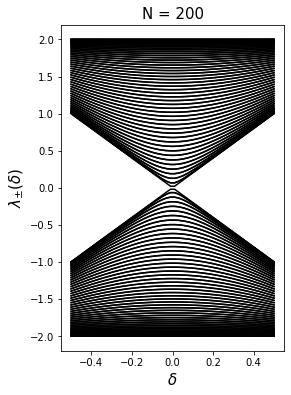

In [3]:
N = 100

anisotropias = np.linspace(-0.5,0.5,50)

for j in range(len(anisotropias)):
    anisotropia = anisotropias[j]
    lambda_k = np.sort(Vpropios_Diag_PBC(anisotropia))

    if (j >= 1):
        Valores_Columna = np.vstack([Valores_Columna, lambda_k])
    else:
        Valores_Columna = lambda_k

fig = plt.figure(figsize = (4,6))
Valores_Propios = np.transpose(Valores_Columna)

for i in range(len(Valores_Propios)):
    plt.plot(anisotropias, Valores_Propios[i], c = "black")  
    
#plt.grid()

plt.title("N = 100", fontsize= 15)
plt.xlabel(r'$\delta$', fontsize= 15)
plt.ylabel(r'$\lambda_{\pm}(\delta)$', fontsize= 15)

plt.savefig("SSH_FINITE_PBC_3.pdf", dpi=300, bbox_inches='tight')

N = 200

anisotropias = np.linspace(-0.5,0.5,50)

for j in range(len(anisotropias)):
    anisotropia = anisotropias[j]
    lambda_k = np.sort(Vpropios_Diag_PBC(anisotropia))

    if (j >= 1):
        Valores_Columna = np.vstack([Valores_Columna, lambda_k])
    else:
        Valores_Columna = lambda_k

fig = plt.figure(figsize = (4,6))
Valores_Propios = np.transpose(Valores_Columna)

for i in range(len(Valores_Propios)):
    plt.plot(anisotropias, Valores_Propios[i], c = "black")  
    
#plt.grid()

plt.title("N = 200", fontsize= 15)
plt.xlabel(r'$\delta$', fontsize= 15)
plt.ylabel(r'$\lambda_{\pm}(\delta)$', fontsize= 15)

plt.savefig("SSH_FINITE_PBC_4.pdf", dpi=300, bbox_inches='tight')

## 2.2.2 OBC

In [25]:
#Función principal para calcular los valores propios Diag_OBConalizando directamente el hamiltoniano

def Vpropios_Diag_OBC(delta):
    global N
    Matriz = np.zeros((N,N))

    a = 0 #Diagonal
    b = 1 + delta #la que aparece despues
    c = 1 - delta #la que aparece primero

    for i in range(N):
        Matriz[i,i] = a
    for i in range(N-1):
        if (i%2 == 0):
            Matriz[i+1,i] = c
            Matriz[i,i+1] = c
        else:
            Matriz[i+1,i] = b
            Matriz[i,i+1] = b
            
    return np.linalg.eigvals(-1*Matriz)            

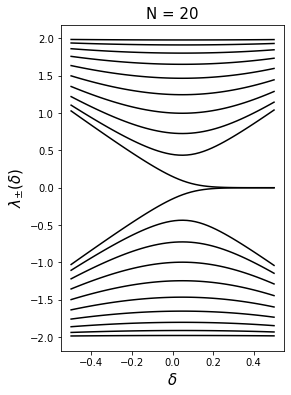

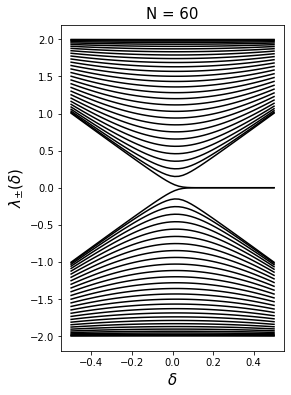

In [26]:
anisotropias = np.linspace(-0.5,0.5,50)

N = 20

for j in range(len(anisotropias)):
    anisotropia = anisotropias[j]
    lambda_k = np.sort(Vpropios_Diag_OBC(anisotropia))

    if (j >= 1):
        Valores_Columna = np.vstack([Valores_Columna, lambda_k])
    else:
        Valores_Columna = lambda_k

fig = plt.figure(figsize = (4,6))
Valores_Propios = np.transpose(Valores_Columna)

for i in range(len(Valores_Propios)):
    plt.plot(anisotropias, Valores_Propios[i], c = "black")  
    
#plt.grid()

plt.title("N = 20", fontsize= 15)
plt.xlabel(r'$\delta$', fontsize= 15)
plt.ylabel(r'$\lambda_{\pm}(\delta)$', fontsize= 15)

plt.savefig("SSH_FINITE_OBC_1.pdf", dpi=300, bbox_inches='tight')

anisotropias = np.linspace(-0.5,0.5,50)

N = 60

for j in range(len(anisotropias)):
    anisotropia = anisotropias[j]
    lambda_k = np.sort(Vpropios_Diag_OBC(anisotropia))

    if (j >= 1):
        Valores_Columna = np.vstack([Valores_Columna, lambda_k])
    else:
        Valores_Columna = lambda_k

fig = plt.figure(figsize = (4,6))
Valores_Propios = np.transpose(Valores_Columna)

for i in range(len(Valores_Propios)):
    plt.plot(anisotropias, Valores_Propios[i], c = "black")  
    
#plt.grid()

plt.title("N = 60", fontsize= 15)
plt.xlabel(r'$\delta$', fontsize= 15)
plt.ylabel(r'$\lambda_{\pm}(\delta)$', fontsize= 15)

plt.savefig("SSH_FINITE_OBC_2.pdf", dpi=300, bbox_inches='tight')

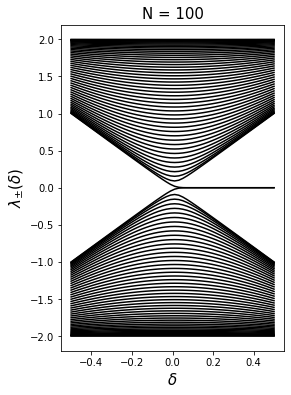

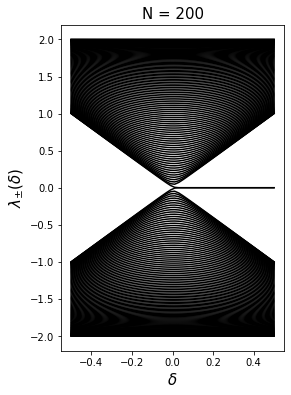

In [6]:
anisotropias = np.linspace(-0.5,0.5,50)

N = 100

for j in range(len(anisotropias)):
    anisotropia = anisotropias[j]
    lambda_k = np.sort(Vpropios_Diag_OBC(anisotropia))

    if (j >= 1):
        Valores_Columna = np.vstack([Valores_Columna, lambda_k])
    else:
        Valores_Columna = lambda_k

fig = plt.figure(figsize = (4,6))
Valores_Propios = np.transpose(Valores_Columna)

for i in range(len(Valores_Propios)):
    plt.plot(anisotropias, Valores_Propios[i], c = "black")  
    
#plt.grid()

plt.title("N = 100", fontsize= 15)
plt.xlabel(r'$\delta$', fontsize= 15)
plt.ylabel(r'$\lambda_{\pm}(\delta)$', fontsize= 15)

plt.savefig("SSH_FINITE_OBC_3.pdf", dpi=300, bbox_inches='tight')

anisotropias = np.linspace(-0.5,0.5,50)

N = 200

for j in range(len(anisotropias)):
    anisotropia = anisotropias[j]
    lambda_k = np.sort(Vpropios_Diag_OBC(anisotropia))

    if (j >= 1):
        Valores_Columna = np.vstack([Valores_Columna, lambda_k])
    else:
        Valores_Columna = lambda_k

fig = plt.figure(figsize = (4,6))
Valores_Propios = np.transpose(Valores_Columna)

for i in range(len(Valores_Propios)):
    plt.plot(anisotropias, Valores_Propios[i], c = "black")  
    
#plt.grid()

plt.title("N = 200", fontsize= 15)
plt.xlabel(r'$\delta$', fontsize= 15)
plt.ylabel(r'$\lambda_{\pm}(\delta)$', fontsize= 15)

plt.savefig("SSH_FINITE_OBC_4.pdf", dpi=300, bbox_inches='tight')